# 5 Raport
-------------------

In [1]:
%%capture
%run Data_Preparation.ipynb
%run Modelling_Data.ipynb

**Overview**

In this exercise, I built the end-to-end project for the car price prediction. I started by web scraping data from one of the polish online marketplace. As a target of my analysis, I chosen Opel Astra car. In the second step, I prepared the data.

--------------------
## The data

 - I used the web scraping method to extract data from page with car offers.
 - I focus on the Opel Astra model.
 - The data was collected from more than 7680 offers. 
 - The data was saved to csv file.
 - I cleaned the data from rows with missing data.
 - I rejected or repaired rows with outliers.
 - Eventually, I selected 19 features.
-------------------
The selected features are as follows:
- Price of a car \[PLN\]: *Price*
- Is a car sold by a private person: *PrivPer*
- Version of a car: *F, G, H, J* or *K*
- Age of a car: *Age*
- Mileage of a car \[km\]: *Mileage*
- Fueal type: *Diesel*, *LPG*
- Is the five-door version: *Doors5*
- Did a car have one owner: *FirstOwner*
- Was a car serviced at a dealership: *ServDealership*
- Was the place of first registration Polish: *Native*
- Does a car have ABS, electric windows, power steering, parking sensors, multifunctional steering, aluminium alloy, cruise control, on-boart comupter: *ABS, ElecWin, PowSteer, ParkingSens, MultiSteer, AAWheels, CruContr, OnBoardComp*
-----------------------
The resulting data frame has 24 columns and 6338 rows.

The summary statistics of the prepared data:

In [2]:
cdf.describe()

,Price,PrivPer,F,G,H,J,K,Age,Mileage,Dispacement,Diesel,LPG,Doors5,FirstOwner,ServDealership,ABS,ElecWin,PowSteer,ParkingSens,MultiSteer,AAWheels,CruContr,OnBoardComp,Native
count,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000,6338.000000
mean,20875.286526,0.449984,0.020511,0.154623,0.484853,0.288735,0.051278,11.074471,164446.653834,1634.993373,0.460713,0.079363,0.802146,0.493531,0.545125,0.941464,0.906595,0.933733,0.289208,0.662196,0.513885,0.510729,0.678132,0.261439
std,14674.902934,0.497531,0.141752,0.361573,0.499810,0.453210,0.220582,4.806511,67277.485187,189.793075,0.498493,0.270325,0.398413,0.499998,0.497999,0.234772,0.291022,0.248768,0.453430,0.472999,0.499847,0.499924,0.467230,0.439453
min,900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11025.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,127000.000000,1598.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,170000.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,28400.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,14.000000,206075.750000,1700.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,89000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000,470000.000000,2200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


------------------------
## Tha analysis and the models

- The realtion between *Price* and *Age* shows strict non-linear correleation between these two features.
- The *Price* is well estimated with *Age* feature by linear regression after quadratic and exponential transformation of varaible. 
- The coefficient of determination for these two transformations is 0.877 and 0.863 respectively.
- However, the residual plot shows same curvature in the residuals for quadratic transformation.
- The price of a car can be well predicted with feature *Price*.

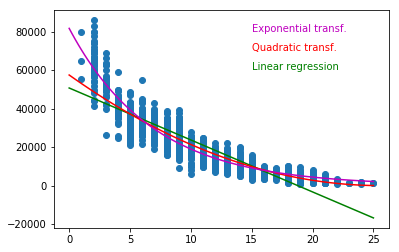

In [3]:
show_linear_regression_models()

---------------------
- In order to to achieve better results, I use the machine learning models from SciKit-Learn. 
- I chosen the following models:
    - Random Forest Regressor
    - Gradient Boosting Regressor
    - AdaBoost
    - Support Vector Regressor
    - Multi-Layer Perceptron Regressor
- The results showed that the best results (higher value of R^2) provide: Random Forest Regressor and Gradient Boosting Regressor.
- In the next step, I tuned both model with hyper-parameters. 
- Finally, the Gradient Boosting Regressor get the higher value of R^2.
-----------------------
Table below shows the results of modelling data with different models:

In [4]:
pd.DataFrame(models, columns=['Model name', 'CV mean', 'CV std', 'R2 for test set'])

,Model name,CV mean,CV std,R2 for test set
0,Linear regression,0.000000,0.000000,0.784079
1,LinReg Square Root Transformation,0.000000,0.000000,0.877018
2,LinReg Logarithmic Transformation,0.000000,0.000000,0.862905
3,Random Forest Regressor,0.950371,0.004120,0.954407
4,Gradient Boosting Regressor,0.956867,0.004394,0.956967
5,AdaBoost Regressor,0.919350,0.007691,0.913397
6,Support Vector Machine Regressor,-0.117005,0.020184,-0.110358
7,Simple Neural Network,0.562896,0.062897,0.644353
8,Final Model - GBR,0.000000,0.000000,0.957385


-----------------
## Price estimation of my car

I have a Opel Astra from 2006 (vers. H). The fuel type of the car is a petrol, but the car has also LPG instalation. I'm not first, owner but car had been registred first time in Poland. The milage is 185,000 km. The car has: ABS, electric windows, power steering.

In terms of the analysis, this mean that:

In [5]:
import numpy as np
my_car = np.array([1, 0, 0, 1, 0, 0, 13, 185000, 1400, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])
print('My car is worth ', int(final_model.predict(my_car.reshape(1,-1))[0]), ' PLN.')

My car is worth  13007  PLN.
